In [126]:
import json
from pprint import pprint
import numpy as np
import math
from pathlib import Path
from os import listdir
from os.path import isfile, join
import pandas as pd

In [2]:
with open('warrior/warrior_000000000039_keypoints.json') as f:
    one_correct_data = json.load(f)

with open('warrior_incorrect/warrior_incorrect_000000000033_keypoints 8.28.45 PM.json') as f1:
    one_incorrect_data = json.load(f1)
pprint(one_correct_data)

{'people': [{'face_keypoints_2d': [],
             'face_keypoints_3d': [],
             'hand_left_keypoints_2d': [],
             'hand_left_keypoints_3d': [],
             'hand_right_keypoints_2d': [],
             'hand_right_keypoints_3d': [],
             'pose_keypoints_2d': [664.67,
                                   202.318,
                                   0.920632,
                                   693.989,
                                   257.204,
                                   0.885338,
                                   646.996,
                                   257.136,
                                   0.816551,
                                   572.582,
                                   237.529,
                                   0.808893,
                                   478.507,
                                   216.048,
                                   0.76705,
                                   737.126,
                                   257.193,

In [3]:
# Let's take only 'pose_keypoints_2d' array
# The array is of length 75 and gives location of 25 keypoints
# x, y and third number is always a confidence level of them between 0 and 1
warrior = one_correct_data['people'][0]['pose_keypoints_2d']
warrior_incorrect = one_incorrect_data['people'][0]['pose_keypoints_2d']

In [4]:
len(warrior)

75

In [5]:
def x_y_points(data):
    """
    from openpose 'pose_keypoints_2d' array, 
    finds x and y corridnates and return two lists
    """
    x_warrior = []
    y_warrior = []
    c_warrior = [] # certainity of pose
    keypoints = data['people'][0]['pose_keypoints_2d']
    for n in range(len(keypoints)):
        if (n%3) == 0:
            x_warrior.append(keypoints[n])
        elif (n%3) == 1:
            y_warrior.append(keypoints[n])
        elif (n%3) == 1:
            c_warrior.append(keypoints[n])
    
    return x_warrior, y_warrior

In [7]:
x_warrior_correct, y_warrior_correct = x_y_points(one_correct_data)

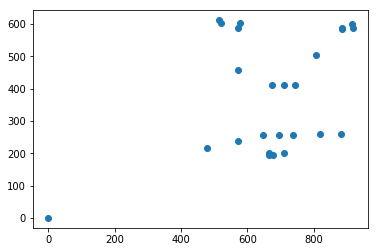

In [9]:
from matplotlib.pyplot import scatter
import matplotlib as plt
scatter(x_warrior_correct, y_warrior_correct)

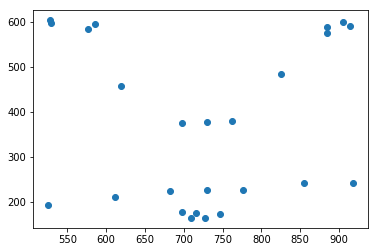

In [10]:
x_warrior_incorrect, y_warrior_incorrect = x_y_points(one_incorrect_data)
scatter(x_warrior_incorrect, y_warrior_incorrect)

In [19]:
POSE_BODY_25_BODY_PARTS  = {
    0:"Nose",
    1:"Neck",
    2:"RShoulder",
    3:"RElbow",
    4:"RWrist",
    5:"LShoulder",
    6:"LElbow",
    7:"LWrist",
    8:"MidHip",
    9:"RHip",
    10:"RKnee",
    11:"RAnkle",
    12:"LHip",
    13:"LKnee",
    14:"LAnkle",
    15:"REye",
    16:"LEye",
    17:"REar",
    18:"LEar",
    19:"LBigToe",
    20:"LSmallToe",
    21:"LHeel",
    22:"RBigToe",
    23:"RSmallToe",
    24:"RHeel",
    25:"Background"}

In [29]:
def straight_arms(x, y, max_slope=0.2):
    """
    input array of 25 x corridnates and array of 25 y corridinates from openpose (x_y_points(data))
    output is slope of the line from one hand to another
    perfectly straight arms would have a slope of zero.
    7:"LWrist" and 4:"RWrist"
    0 - straight
    1 - not straight
    returns slope and label
    """
    slope = (y[4] - y[7])/(x[4]-x[7])
    if -max_slope <= slope <= max_slope:
        return slope, 0
    else:
        return slope, 1
    

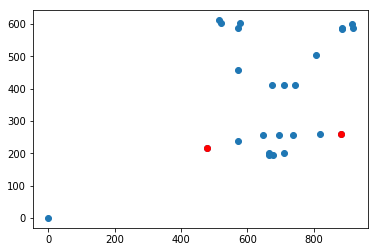

In [156]:
scatter(x_warrior_correct, y_warrior_correct)
scatter(x_warrior_correct[4:5]+x_warrior_correct[7:8], y_warrior_correct[4:5]+y_warrior_correct[7:8], color='red')

In [30]:
straight_arms(x_warrior_correct, y_warrior_correct)

(0.10680063930221897, 0)

In [31]:
straight_arms(x_warrior_incorrect, y_warrior_incorrect) # arms are straight in incorrect

(0.12495087104990481, 0)

In [49]:
def straight_torso(x, y, min_slope=9):
    """
    1:"Neck" and 8:"MidHip"
    perfect would be a vertial line, so steep/high slope is ideal
    0 - straight
    1 - not straight
    returns slope and label
    """
    slope = (y[1] - y[8])/(x[1]-x[8])
    if abs(slope) >= min_slope:
        return slope, 0
    else:
        return slope, 1
    

In [50]:
straight_torso(x_warrior_correct, y_warrior_correct)

(9.886673058485147, 0)

In [52]:
straight_torso(x_warrior_incorrect, y_warrior_incorrect) # torso is straight in incorrect

(-5586.222222213189, 0)

In [85]:
def torso_forward(x, y, min_slope=0.3):
    """
    1:"Neck" and 8:"MidHip"
    perfect would be a vertial line, so steep/high slope is ideal
    for too far forward we see if the slope if larger than the min slope 
    0 - not too far forward
    1 - too far forward
    returns slope and label
    """
    rev_slope = (x[1]-x[8])/(y[1] - y[8])
    if rev_slope >= min_slope:
        return rev_slope, 1
    else:
        return rev_slope, 0

In [86]:
torso_forward(x_warrior_correct, y_warrior_correct)

(0.10114625962489565, 0)

In [87]:
torso_forward(x_warrior_incorrect, y_warrior_incorrect)

(-0.00017901185456310273, 0)

In [91]:
def torso_backward(x, y, min_slope=-0.3):
    """
    1:"Neck" and 8:"MidHip"
    perfect would be a vertial line, so steep/high slope is ideal
    swtiches x and y for easier computation, want reversed slope to be zero if straight
    for too far forward we see if the slope if larger than the min slope 
    0 - not too far forward
    1 - too far forward
    returns slope and label
    """
    rev_slope = (x[1]-x[8])/(y[1] - y[8])
    if rev_slope <= min_slope:
        return rev_slope, 1
    else:
        return rev_slope, 0

In [92]:
torso_forward(x_warrior_correct, y_warrior_correct)

(0.10114625962489565, 0)

In [93]:
torso_forward(x_warrior_incorrect, y_warrior_incorrect)

(-0.00017901185456310273, 0)

In [94]:
def hips_square(x, y, max_slope=0.2):
    """
    9:"RHip" and 12:"LHip"
    straight line (square hips) would have a slope of 0
    0 - stright
    1 - not straight
    """
    slope = (y[9] - y[12])/(x[9]-x[12])
    if -max_slope <= slope <= max_slope:
        return slope, 0
    else:
        return slope, 1
    

In [95]:
hips_square(x_warrior_correct, y_warrior_correct)

(-0.028522241512626875, 0)

In [97]:
hips_square(x_warrior_incorrect, y_warrior_incorrect)  # hips are square in the incorrect one

(0.08990672678979562, 0)

In [99]:
def shoulders_up(x, y, max_slope=0.2):
    """
    1:"Neck",
    2:"RShoulder",
    5:"LShoulder".
    looks at line from left shoulder to neck, and line from right shoulder to neck
    if either are not straight returns 1
    if both are flat (slope of 0 or close to 0) returns 1
    """
    left_slope = (y[1] - y[5])/(x[1]-x[5])
    right_slope = (y[1] - y[2])/(x[1]-x[2])
    if abs(left_slope) >= max_slope or abs(right_slope) >= max_slope:
        return left_slope, right_slope, 1
    else:
        return left_slope, right_slope, 0


In [108]:
[x_warrior_correct[1:3] x_warrior_correct[5]]

[[693.989, 646.996], 737.126]

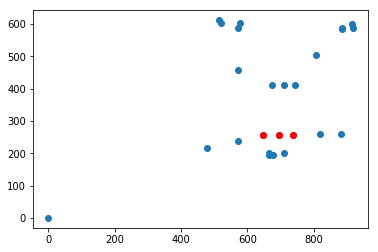

In [110]:
scatter(x_warrior_correct, y_warrior_correct)
scatter(x_warrior_correct[1:3]+ [x_warrior_correct[5]], y_warrior_correct[1:3]+[y_warrior_correct[5]], color='red')

In [100]:
shoulders_up(x_warrior_correct, y_warrior_correct)

(-0.00025500150682764483, 0.0014470240248544157, 0)

In [102]:
shoulders_up(x_warrior_correct, y_warrior_incorrect) # shoulders are not up

(-0.0002781834619931954, 0.04043155363564794, 0)

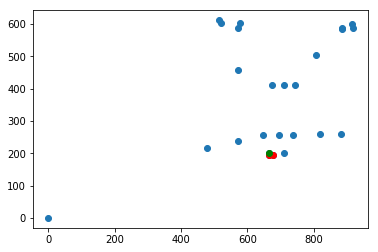

In [114]:
scatter(x_warrior_correct, y_warrior_correct)
scatter(x_warrior_correct[15:17], y_warrior_correct[15:17], color='red')
scatter(x_warrior_correct[0], y_warrior_correct[0], color='green')

In [123]:
def head_front(x, y, max_ratio_diff=0.2):
    """
    0:"Nose"
    15:"REye"
    16:"LEye"
    17:"REar"
    18:"LEar"
    Compares distance from left eye to right eye
    If looking forward eye to eye distance will be larger and closer to ear to ear distance
    If looking if head is front they will be small, and much smaller than ear to ear distance
    Divide by length from ear to ear to normalize and account for different distance
    label 0 - head is front
    label 1 - head is not facing the front (facing the side)
    """
    ear_dist = np.sqrt((x[17]-x[18])**2+(y[17]-y[18])**2)
    eye_dist = np.sqrt((x[15]-x[16])**2+(y[15]-y[16])**2)
    ratio = eye_dist/ear_dist
    if ratio > max_ratio_diff:
        return ratio, 1
    else:
        return ratio, 0

In [124]:
head_front(x_warrior_correct, y_warrior_correct)

(0.018574595917432005, 0)

In [125]:
head_front(x_warrior_incorrect, y_warrior_incorrect)

(0.3585888240527634, 1)

In [135]:
def front_knee_obtuse(x, y, max_angle=95, side='right'):
    """
    10:"RKnee",
    11:"RAnkle",
    13:"LKnee",
    14:"LAnkle"
    """
    if side =='right':
        degrees = math.degrees(math.atan2(y[11]-y[10], x[11]-x[10]))
    else:
        degrees = math.degrees(math.atan2(y[14]-y[13], x[14]-x[13]))
    if degrees > max_angle:
        return degrees, 1
    else:
        return degrees, 0 
        

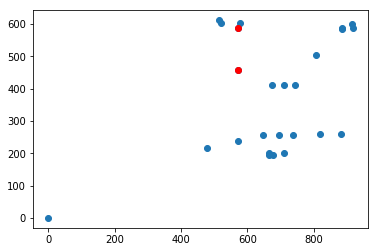

In [127]:
scatter(x_warrior_correct, y_warrior_correct)
scatter(x_warrior_correct[10:12], y_warrior_correct[10:12], color='red')

In [130]:
math.degrees(math.atan2(y_warrior_correct[11]-y_warrior_correct[10], x_warrior_correct[11]-x_warrior_correct[10]))


90.87426388740911

In [131]:
math.degrees(math.atan2(y_warrior_correct[14]-y_warrior_correct[13], x_warrior_correct[14]-x_warrior_correct[13]))


45.64220539390535

In [136]:
front_knee_obtuse(x_warrior_correct, y_warrior_correct, side='right')

(90.87426388740911, 0)

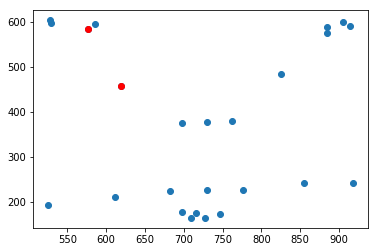

In [132]:
scatter(x_warrior_incorrect, y_warrior_incorrect)
scatter(x_warrior_incorrect[10:12], y_warrior_incorrect[10:12], color='red')

In [133]:
math.degrees(math.atan2(y_warrior_incorrect[11]-y_warrior_incorrect[10], x_warrior_incorrect[11]-x_warrior_incorrect[10]))


108.95074880686288

In [134]:
math.degrees(math.atan2(y_warrior_incorrect[14]-y_warrior_incorrect[13], x_warrior_incorrect[14]-x_warrior_incorrect[13]))


57.41034408912557

In [137]:
front_knee_obtuse(x_warrior_incorrect, y_warrior_incorrect, side='right')

(108.95074880686288, 1)

In [140]:
def front_knee_acute(x, y, min_angle=85, side='right'):
    """
    10:"RKnee",
    11:"RAnkle",
    13:"LKnee",
    14:"LAnkle"
    """
    if side =='right':
        degrees = math.degrees(math.atan2(y[11]-y[10], x[11]-x[10]))
    else:
        degrees = math.degrees(math.atan2(y[14]-y[13], x[14]-x[13]))
    if degrees < min_angle:
        return degrees, 1
    else:
        return degrees, 0 

In [141]:
front_knee_acute(x_warrior_correct, y_warrior_correct, side='right')

(90.87426388740911, 0)

In [143]:
front_knee_acute(x_warrior_correct, y_warrior_correct, side='left')

(45.64220539390535, 1)

In [142]:
front_knee_acute(x_warrior_incorrect, y_warrior_incorrect, side='right')

(108.95074880686288, 0)

In [144]:
front_knee_acute(x_warrior_incorrect, y_warrior_incorrect, side='left')

(57.41034408912557, 1)

In [151]:
def step_wider(x, y, min_ratio=0.5):
    """
    4:"RWrist",
    7:"LWrist",
    11:"RAnkle",
    14:"LAnkle".
    compares arm span to distance between feet
    if feet are wide enough, the distance between feet will be similar 
    to the distance between arms
    label - 0 feet are wide enough
    label - 1 feet are too narrow
    """
    arm_distance = np.sqrt((x[7]-x[4])**2+(y[7]-y[4])**2)
    feet_disatance = np.sqrt((x[11]-x[14])**2+(y[11]-y[14])**2)
    ratio = feet_disatance/arm_distance
    if ratio < min_ratio:
        return ratio, 1
    else:
        return ratio, 0
    

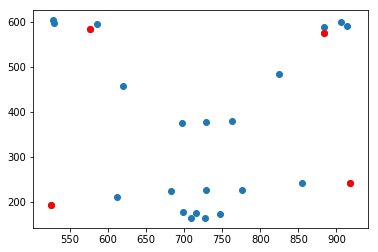

In [152]:
scatter(x_warrior_incorrect, y_warrior_incorrect)
scatter([x_warrior_incorrect[4], x_warrior_incorrect[7], x_warrior_incorrect[11], x_warrior_incorrect[14]],
        [y_warrior_incorrect[4], y_warrior_incorrect[7], y_warrior_incorrect[11], y_warrior_incorrect[14]], 
        color='red')

In [154]:
step_wider(x_warrior_incorrect, y_warrior_incorrect)

(0.779420136821977, 0)

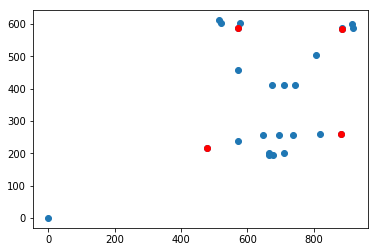

In [149]:
scatter(x_warrior_correct, y_warrior_correct)
scatter([x_warrior_correct[4], x_warrior_correct[7], x_warrior_correct[11], x_warrior_correct[14]],
        [y_warrior_correct[4], y_warrior_correct[7], y_warrior_correct[11], y_warrior_correct[14]], 
        color='red')


In [155]:
step_wider(x_warrior_correct, y_warrior_correct)

(0.7775950950835203, 0)

## Combined

In [188]:
def warrior2_labels(json_path, side='right'):
    """
    for a single json file
    Returns a list of labels and list of values
    order: head_front, sholders, arms, torso forward, torso backward hips, knee acute, knee obtuse, step wider
    1 - needs to be adjusted
    0 - good
    """
    with open(json_path) as f:
        data = json.load(f)
    x, y = x_y_points(data)
    labels = []
    values = []
    ratio, label = head_front(x, y)
    labels.append(label)
    values.append(ratio)
    left_slope, right_slope, label = shoulders_up(x, y)
    labels.append(label)
    values.append((left_slope, right_slope))
    slope, label = straight_arms(x, y)
    labels.append(label)
    values.append(slope)
    slope, label = torso_forward(x, y)
    labels.append(label)
    values.append(slope)
    slope, label = torso_backward(x, y)
    labels.append(label)
    values.append(slope)
    slope, label = hips_square(x, y)
    labels.append(label)
    values.append(slope)
    if side == 'right':
        acute_angle, acute_label = front_knee_acute(x, y, side='right')
        obtuse_angle, obtuse_label = front_knee_obtuse(x, y, side='right')
    else: 
        acute_angle, acute_label = front_knee_acute(x, y, side='left')
        obtuse_angle, obtuse_label = front_knee_obtuse(x, y, side='left')
    labels.append(acute_label)
    values.append(acute_angle)
    labels.append(obtuse_label)
    values.append(obtuse_angle)
    distance, label = step_wider(x, y)
    labels.append(label)
    values.append(distance)
    return labels, values

In [189]:
file_correct = 'warrior/warrior_000000000039_keypoints.json'  
warrior2_labels(file_correct)

([0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.018574595917432005,
  (-0.00025500150682764483, 0.0014470240248544157),
  0.10680063930221897,
  0.10114625962489565,
  0.10114625962489565,
  -0.028522241512626875,
  90.87426388740911,
  90.87426388740911,
  0.7775950950835203])

In [190]:
file_incorrect = 'warrior_incorrect/warrior_incorrect_000000000033_keypoints 8.28.45 PM.json'

incorrect_labels, incorrect_values = warrior2_labels(file_incorrect)
print(incorrect_labels)
print(incorrect_values)

[1, 0, 0, 0, 0, 0, 0, 1, 0]
[0.3585888240527634, (-0.0002557163253564142, 0.040381713459862786), 0.12495087104990481, -0.00017901185456310273, -0.00017901185456310273, 0.08990672678979562, 108.95074880686288, 108.95074880686288, 0.779420136821977]


In [196]:
def warroir2_label_json_folder(path_to_json, side='right'):
    """
    assumes directory has only the json files for still moment of one pose
    takes averages of all json 
    order: head_front, sholders, arms, torso forward, torso backward hips, knee acute, knee obtuse, step wider
    1 - needs to be adjusted
    0 - good
    """
    PATH = Path(path_to_json)
    files = list(PATH.iterdir())
    warrior = []
    for js in files:
        try:
            data = json.load(open(js,"r"))
            keypoints = data['people'][0]['pose_keypoints_2d']
            warrior.append(keypoints)
        except:
            continue
    warrior = np.array(warrior)
    warrior_means = np.mean(warrior, axis=1)  # average for each point accros all jsons
    x, y = x_y_points(data)
    labels = []
    values = []
    ratio, label = head_front(x, y)
    labels.append(label)
    values.append(ratio)
    left_slope, right_slope, label = shoulders_up(x, y)
    labels.append(label)
    values.append((left_slope, right_slope))
    slope, label = straight_arms(x, y)
    labels.append(label)
    values.append(slope)
    slope, label = torso_forward(x, y)
    labels.append(label)
    values.append(slope)
    slope, label = torso_backward(x, y)
    labels.append(label)
    values.append(slope)
    slope, label = hips_square(x, y)
    labels.append(label)
    values.append(slope)
    if side == 'right':
        acute_angle, acute_label = front_knee_acute(x, y, side='right')
        obtuse_angle, obtuse_label = front_knee_obtuse(x, y, side='right')
    else: 
        acute_angle, acute_label = front_knee_acute(x, y, side='left')
        obtuse_angle, obtuse_label = front_knee_obtuse(x, y, side='left')
    labels.append(acute_label)
    values.append(acute_angle)
    labels.append(obtuse_label)
    values.append(obtuse_angle)
    distance, label = step_wider(x, y)
    labels.append(label)
    values.append(distance)
    return labels, values

In [197]:
test = [[4, 5, 7], [1,2, 4], [2, 5, 6]]

In [198]:
test = np.array(test)
test

array([[4, 5, 7],
       [1, 2, 4],
       [2, 5, 6]])

In [199]:
np.mean(test, axis=1)

array([5.33333333, 2.33333333, 4.33333333])

In [200]:
path_to_json = 'warrior/'

warroir2_label_json_folder(path_to_json)

([0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.01855451735602316,
  (0.0005574676426382203, 0.04102182011708398),
  0.12009748255138882,
  0.03941022100351464,
  0.03941022100351464,
  -0.028191015664920233,
  89.19774718664036,
  89.19774718664036,
  0.7948311171346703])